# DC Python Tutorial 2: 10-19
 
Hint: If you are typing a function name and want to know what the options are for completing what you are typing, just hit the tab key for a menu of options.

Hint: If you want to see the source code associated with a function, you can do the following
import inspect
inspect.getsource(foo) 

Where "foo" is the function that you'd like to learn about. 

Each cell in Jupyter is either code or markdown (select in the drop down menu above). You can learn about markdown language from the help menu. Markdown allows you to create very nicely formatted text including Latex equations.
$$c = \sqrt{a^2 + b^2}$$

Each cell is either in edit mode (select this cell and press the enter key) or in display mode (press shift enter). Shift Enter also executes the code in the cell.

When you open a Jupyter notebook it is convenient to go to the cell menu and select Run All so that all results are calculated and displayed.

The Python Kernel remembers all definitions (functions and variables) as they are defined based on execution of the cells in the Jupyter notebook. Thus if you fail to execute a cell, the parameters defined in that cell won't be available. Similarly, if you define a parameter and then delete that line of code, that parameter remains defined until you go to the Kernel menu and select restart. It is good practice to select Restart & Run All from the Kernel menu after completing an assignment to make sure that everything in your notebook works correctly and that you haven't deleted an essential line of code!

In [1]:
#Here we import packages that we will need for this notebook. You can find out about these packages in the Help menu.


# although math is "built in" it needs to be imported so it's functions can be used.
import math

from scipy import constants, interpolate

#see numpy cheat sheet https://www.dataquest.io/blog/images/cheat-sheets/numpy-cheat-sheet.pdf
#The numpy import is needed because it is renamed here as np.
import numpy as np

#Pandas is used to import data from spreadsheets
import pandas as pd
 
import matplotlib.pyplot as plt

# sys and os give us access to operating system directory paths and to sys paths.
import sys, os

# If you place your GitHub directory in your documents folder and 
# clone both the design challenge notebook and the AguaClara_design repo, then this code should all work.
# If you have your GitHub directory at a different location on your computer, 
# then you will need to adjust the directory path below.
# add the path to your GitHub directory so that python can find files in other contained folders.
path1 = '~'
path2 = 'Documents'
path3 = 'GitHub'
path4 = os.path.join(path1, path2, path3)
myGitHubdir = os.path.expanduser(path4)
if myGitHubdir not in sys.path:
    sys.path.append(myGitHubdir)

# add imports for AguaClara code that will be needed
# physchem has functions related to hydraulics, fractal flocs, flocculation, sedimentation, etc.
from aide_design import physchem as pc

# pipedatabase has functions related to pipe diameters
from aide_design import pipedatabase as pipe

# units allows us to include units in all of our calculations
from aide_design.units import unit_registry as u

from aide_design import utility as ut


---

## Resources in getting started with Python 
Here are some basic [Python functions](http://docs.python.org/3/library/functions.html) that might be helpful to look through. 

## Transitioning From Matlab To Python

**Indentation** - When writing functions or using statements, Python recognizes code blocks from the way they are indented.  A code block is a group of statements that, together, perform a task. A block begins with a header that is followed by one or more statements that are indented with respect to the header. The indentation indicates to the Python interpreter, and to programmers that are reading the code, that the indented statements and the preceding header form a code block.

**Suppressing Statements** - Unlike Matlab, you do not need a semi-colon to suppress a statement in Python;

**Indexing** - Matlab starts at index 1 whereas Python starts at index 0. 

**Functions** - In Matlab, functions are written by invoking the keyword "function", the return parameter(s), the equal to sign, the function name and the input parameters. A function is terminated with "end". 

`function y = average(x)
if ~isvector(x)
    error('Input must be a vector')
end
y = sum(x)/length(x); 
end`

In Python, functions can be written by using the keyword "def", followed by the function name and then the input parameters in paranthesis followed by a colon. A function is terminated with "return". 

`def average(x):
   if ~isvector(x)
       raise VocationError("Input must be a vector")
   return sum(x)/length(x); `
  
**Statements** - for loops and if statements do not require the keyword "end" in Python. The loop header in Matlab varies from that of Python. Check examples below:

Matlab code

`s = 10;                                               
H = zeros(s);                                                                  
for c = 1:s                                          
    for r = 1:s                                         
        H(r,c) = 1/(r+c-1);                                                  
    end
end`

Python code

`s = 10 
H = []
for (r in range(s)):
    for (c in range(s)):
        H[r][c].append(1/(r+c-1)`
   
   
**Printing** - Use "print()" in Python instead of "disp" in Matlab.

**Helpful Documents**

[Numpy for Matlab Users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)

[Stepping from Matlab to Python](http://stsievert.com/blog/2015/09/01/matlab-to-python/)

[Python for Matlab Users, UC Boulder](http://researchcomputing.github.io/meetup_fall_2014/pdfs/fall2014_meetup13_python_matlab.pdf)

---

## Arrays and Lists

Python has no native array type. Instead, it has lists, which are defined using [ ]:

In [2]:
a = [0,1,2,3]

Python has a number of helpful commands to modify lists, and you can read more about them [here](https://docs.python.org/2/tutorial/datastructures.html).

In order to use lists as arrays, numpy (numpy provides tools for working with **num**bers in **py**thon) provides an array data type that is defined using ( ). 

In [3]:
a_array = np.array(a)

In [4]:
a_array

array([0, 1, 2, 3])

Pint, which adds unit capabilities to Python, (see section on units below) is compatible with NumPy, so it is possible to add units to arrays and perform certain calculations with these arrays. We recommend using NumPy arrays rather than lists because NumPy arrays can handle units. Additionally, use functions from NumPy if possible instead of function from the math package when possible because the math package does not yet handle units. Units are added by multiplying the number by the unit raised to the appropriate power. The pint unit registry was imported above as "u" and thus the units for milliliters are defined as u.mL.

In [5]:
a_array_units = a_array * u.m

In [6]:
a_array_units

<Quantity([0 1 2 3], 'meter')>

In order to make a 2D array, you can use the same [NumPy array command](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html).

In [7]:
b = np.array([[0,1,2],[3,4,5],[6,7,8]])*u.mL
b

<Quantity([[0 1 2]
 [3 4 5]
 [6 7 8]], 'milliliter')>

Indexing is done by row and then by column. To call all of the elements in a row or column, use a colon. As you can see in the following example, indexing in python begins at zero. So `b[:,1]` is calling all rows in the second column

In [8]:
b[:,1]

<Quantity([1 4 7], 'milliliter')>

If you want a specific range of values in an array, you can also use a colon to slice the array, with the number before the colon being the index of the first element, and the number after the colon being **one greater** than the index of the last element.

In [9]:
b[1:3,0]

<Quantity([3 6], 'milliliter')>

For lists and 1D arrays, the `len()` command can be used to determine the length. Note that the length is NOT equal to the index of the last element because the indexes are zero based. The len function can be used with lists and arrays. For multiple dimension arrays the `len()` command returns the length of the first dimension.

In [10]:
len(a)

4

In [11]:
len(b)

3

For any higher dimension of array, `numpy.size()` can be used to find the total number of elements and `numpy.shape()` can be used to learn the dimensions of the array.

In [12]:
np.size(b)

9

In [13]:
np.shape(b)

(3, 3)

For a listing of the commands you can use to manipulate numpy arrays, refer to the [scipy documentation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

Sometimes, it is helpful to have an array of elements that range from zero to a specified number. This can be useful, for example, in creating a graph. To create an array of this type, use [numpy.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).

In [14]:
crange = np.arange(10)

In [15]:
crange

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
cdetailedrange = np.arange(5,10,0.1)

In [17]:
cdetailedrange

array([ 5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,
        6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,
        7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,
        8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,
        9.4,  9.5,  9.6,  9.7,  9.8,  9.9])

---

## Units

Units are essential to engineering calculations. Units provide a quick check on all of our calculations to help reduce the number of errors in our analysis. Getting the right dimensions back from a calculation doesn't prove that the answer is correct, but getting the wrong dimensions back does prove that the answer is wrong! Unit errors from incorrect conversions are common when using apps that don't calculate with units. Engineering design work should always include units in the calculations. 

We use the [pint package](https://pint.readthedocs.io/) to add unit capabilities to our calculations in Python. We have imported the `pint.UnitRegistry` as 'u' and thus all of pint's units can be used by placing a 'u.' in front of the unit name. Meters are `u.m`, seconds are `u.s`, etc. Most units are simple values that can be used just like other terms in algebraic equations. The exception to this are units that have an offset. For example, in the equation PV=nRT, temperature must be given with units that have value of zero at absolute zero. We would like to be able to enter 20 degC into that equation and have it handle the units correctly. But you can't convert from degC to Kelvin by simply multiplying by a conversion factor. Thus for temperature the units have to be handled in a special way.

Temperatures require use of the u.Quantity function to enter the value and the units of temperature separated by a ',' rather than by a multiplication symbol. This is because it doesn't make sense to multiply by a temperature unit because temperatures (that aren't absolute temperatures) have both a slope and a nonzero intercept.

You can find [constants that are defined in pint](https://github.com/hgrecco/pint/blob/master/pint/constants_en.txt) at the github page for pint.

Below is a simple calculation illustrating the use of units to calculate the flow through a vertical pipe given a velocity and an inner diameter. We will illustrate how to calculate pipe diameters further ahead in the tutorial.

In [18]:
V_up = 1*u.mm/u.s
D_reactor = 1*u.inch
A_reactor = pc.area_circle(D_reactor)
Q_reactor = V_up*A_reactor
Q_reactor

<Quantity(0.0005067074790974977, 'meter ** 2 * millimeter / second')>

The result isn't formatted very nicely. We can select the units we'd like to display by using the `.to` method.

In [19]:
Q_reactor.to(u.mL/u.s)

<Quantity(0.5067074790974977, 'milliliter / second')>

We can also force the display to be in the metric base units

In [20]:
Q_reactor.to_base_units()

<Quantity(5.067074790974977e-07, 'meter ** 3 / second')>

If you need to strip units from a quantity (for example, for calculations using funtions that don't support units) you can use the `.magnitude` method. It is important that you force the quantity to be in the correct units before stripping the units.

In [21]:
Q_reactor.to(u.mL/u.s).magnitude

0.5067074790974977

### Significant digits
Python will happily display results with 17 digits of precision. We'd like to display a reasonable number of significant digits so that we don't get distracted with 14 digits of useless information. We created a [sig function in the AguaClara_design repository](https://github.com/AguaClara/AguaClara_design/blob/master/utility.py) that allows you to specify the number of significant digits to display. You can couple this with the print function to create a well formatted solution to a calculation. The sig function also displays the accompanying units.  

The sig function call is `ut.sig(value, sigfig)`. 

### Example problem and solution.
Calculate the number of moles of methane in a 20 L container at 15 psi above atmospheric pressure with a temperature of 30 C.

In [22]:
# First assign the values given in the problem to variables.
P = 15 * u.psi + 1 * u.atm
T = u.Quantity(30,u.degC)
V = 20 * u.L
# Use the equation PV=nRT and solve for n, the number of moles.
# The universal gas constant is available in pint.
nmolesmethane = (P*V/(u.R*T.to(u.kelvin))).to_base_units()
print('There are '+ut.sig(nmolesmethane,3)+' of methane in the container.')
nmolesmethane

There are 1.62 mol of methane in the container.


<Quantity(1.6246299433154001, 'mole')>

---

## Functions 

When it becomes necessary to do the same calculation multiple times, it is useful to create a function to facilitate the calculation in the future.

- Function blocks begin with the keyword def followed by the function name and parentheses ( ).
- Any input parameters or arguments should be placed within these parentheses. 
- The code block within every function starts with a colon (:) and is indented.
- The statement return [expression] exits a function and returns an expression to the user. A return statement with no arguments is the same as return None.
- (Optional) The first statement of a function can the documentation string of the function or docstring, writeen with apostrophes ' '.

Below is an example of a function that takes three inputs, pressure, volume, and temperature, and returns the number of moles. 

In [23]:
# Creating a function is easy in Python
def nmoles(P,V,T):
    return (P*V/(u.R*T.to(u.kelvin))).to_base_units()

Try using the new function to solve the same problem as above. You can reuse the variables. You can use the new function call inside the print statement.

In [24]:
print('There are '+ut.sig(nmoles(P,V,T),3)+' of methane in the container.')

There are 1.62 mol of methane in the container.


---

## Density Function
We will create and graph functions describing density and viscosity of water as a function of temperature. We will use the [scipy 1D interpolate function](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#d-interpolation-interp1d) to create smooth interpolation between the known data points to generate a smooth function.

`density_water`, defined in [`physchem`](https://github.com/AguaClara/AguaClara_design/blob/master/physchem.py), is a function that returns a fluid's density at a given temperature. It has one input parameter, temperature (in Celsius).

In [25]:
# Here is an example of how you could define the function yourself if you chose.

# Below are corresponding arrays of temperature and water density with appropriate units attached.

# The 1d interpolation function will use a cubic spline.
Tarray = u.Quantity([0,5,10,20,30,40,50,60,70,80,90,100],u.degC)
rhoarray = [999.9,1000,999.7,998.2,995.7,992.2,988.1,983.2,977.8,971.8,965.3,958.4]*u.kg/u.m**3
def DensityWater(T):
    
    rhointerpolated=interpolate.interp1d(Tarray, rhoarray, kind='cubic')
    rho=rhointerpolated(T.to(u.degC))
    return rho*u.kg/u.m**3

# You can get the density of water for any temperature using this function call.
print('The density of water at '+ut.sig(u.Quantity(20,u.degC),3) +' is '+ut.sig(DensityWater(u.Quantity(20,u.degC)),4)+'.')

The density of water at 20.0 celsius is 998.2 kg/m³.


---

## Pipe Database

The [`pipedatabase`](https://github.com/AguaClara/AguaClara_design/blob/master/pipedatabase.py) file in the `AguaClara_design` has many useful functions concerning pipe sizing. It provides functions that calculate actual pipe inner and outer diameters given the nominal diameter of the pipe. Note that nominal diameter just means the diameter that it is called (hence the discriptor "nominal") and thus a 1 inch nominal diameter pipe might not have any dimensions that are actually 1 inch!

In [26]:
# The OD function in pipedatabase returns the outer diameter of a pipe given the nominal diameter, ND. 
pipe.OD(6*u.inch)

<Quantity(6.625, 'inch')>

The ND_SDR_available function returns the nominal diameter of a pipe that has an inner diameter equal to or greater than the requested inner diameter [SDR, standard diameter ratio](http://www.engineeringtoolbox.com/sdr-standard-dimension-ratio-d_318.html). Below we find the smallest available pipe that has an inner diameter of at least 7 cm

In [27]:
IDmin = 7 * u.cm
SDR = 26
ND_my_pipe = pipe.ND_SDR_available(IDmin,SDR)
ND_my_pipe 

<Quantity(3.0, 'inch')>

The actual inner diameter of this pipe is

In [28]:
ID_my_pipe = pipe.ID_SDR(ND_my_pipe,SDR)
print(ut.sig(ID_my_pipe.to(u.cm),2))

8.2 cm


We can display the available nominal pipe sizes that are in our database.

In [29]:
pipe.ND_all_available()

<Quantity([  0.5   1.    2.    3.    4.    6.    8.   10.   12.   16.   18.   24.
  30.   36.   48.   60.   72. ], 'inch')>

---

## Physchem
The 'AguaClara_design' [physchem](https://github.com/AguaClara/AguaClara_design/blob/master/physchem.py) has many useful fluids functions including Reynolds number, head loss equation, orifice equations, viscosity etc. 

---

## Viscosity Functions

In [30]:
#Define the temperature of the fluid so that we can calculate the kinematic viscosity
temperature = u.Quantity(20,u.degC)
#Calculate the kinematic viscosity using the function in physchem which we access using "pc"
nu=pc.viscosity_kinematic(temperature)
print('The kinematic viscosity of water at '+ut.sig(temperature,2)+' is '+ut.sig(nu,3))

The kinematic viscosity of water at 20 celsius is 1.00e-6 m²/s


---


## Our First Graph!

We will use [matplotlib](https://matplotlib.org/) to create a graph of water density as a function of temperature. [Here](https://matplotlib.org/users/pyplot_tutorial.html) is a quick tutorial on graphing. 

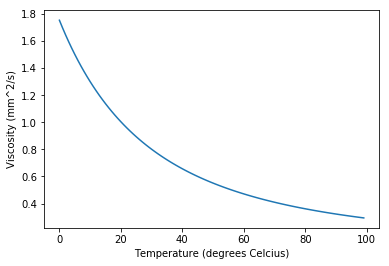

In [31]:
# Create a list of 100 numbers between 0 and 100 and then assign the units of degC to the array. 
# This array will be the x values of the graph.

GraphTarray = u.Quantity(np.arange(100),u.degC)

#Note the use of the .to method below to display the results in a particular set of units.
plt.plot(GraphTarray, pc.viscosity_kinematic(GraphTarray).to(u.mm**2/u.s), '-')
plt.xlabel('Temperature (degrees Celcius)')
plt.ylabel('Viscosity (mm^2/s)')
plt.show()

### Reynolds number
We will use the physchem functions to calculate the Reynolds number for flow through a pipe.

In [32]:
Q = 5*u.L/u.s
D = pipe.ID_SDR(4*u.inch,26)

Reynolds_pipe = pc.re_pipe(Q,D,nu)
Reynolds_pipe

60124.953167297012

Now use the sig function to display calulated values to a user specified number of significant figures. 

In [33]:
print('The Reynolds number is '+ut.sig(pc.re_pipe(Q,D,nu),3))

The Reynolds number is 6.01e+4


Here is a table of a few of the equations describing pipe flow and their physchem function counterparts. 

## Assorted Fluids Functions

| Equation Name                         |                                                                                            Equation                                                                                           |                       Physchem function                      |
|---------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:------------------------------------------------------------:|
| Reynolds Number                       |                                                                                 $Re= \frac{{4Q}}{{\pi D\nu }}$                                                                                |                 `re_pipe(FlowRate, Diam, Nu)`                |
| Swamee-Jain Turbulent Friction factor           |                ${\rm{f}} = \frac{{0.25}}{{{{\left[ {\log \left( {\frac{\varepsilon }{{3.7D}} + \frac{{5.74}}{{{{{\mathop{\rm Re}\nolimits} }^{0.9}}}}} \right)} \right]}^2}}}$                |             `fric(FlowRate, Diam, Nu, PipeRough)`            |
| Laminar Friction factor           |                ${\rm{f}} = \frac{64}{Re}$                |                         |
| Hagen Pousille laminar flow head loss |                                                   ${h_{\rm{f}}} = \frac{{32\mu LV}}{{\rho g{D^2}}} = \frac{{128\mu LQ}}{{\rho g\pi {D^4}}}$                                                   |                                                              |
| Darcy Weisbach head loss              |                                                             ${h_{\rm{f}}} = {\rm{f}}\frac{8}{{g{\pi ^2}}}\frac{{L{Q^2}}}{{{D^5}}}$                                                            |    `headloss_fric(FlowRate, Diam, Length, Nu, PipeRough)`    |
| Swamee-Jain equation for diameter                              | $0.66\left ( \varepsilon ^{1.25}\left ( \frac{LQ^{2}}{gh_{f}} \right )^{4.75}+\nu Q^{9.4}\left ( \frac{L}{gh_{f}} \right )^{5.2} \right )^{0.04}$| `diam_swamee(FlowRate, HeadLossFric, Length, Nu, PipeRough)` |

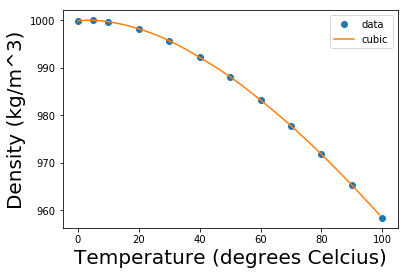

In [34]:
# create a plot that shows both the original data values (plotted as points) 
# and the smooth curve that shows the density function.
# Note that Tarray and rhoarray were defined much earlier in this tutorial.

#We will plot the data points using circles 'o' and the smooth function using a line '-'.

plt.plot(Tarray, rhoarray, 'o', GraphTarray, (DensityWater(GraphTarray)), '-')
# For an x axis log scale use plt.semilogx(Tarray, rhoarray, 'o', xnew, f2(xnew), '-')
# For a y axis log scale use plt.semilogy(Tarray, rhoarray, 'o', xnew, f2(xnew), '-')
# For both axis log scale use plt.loglog(Tarray, rhoarray, 'o', xnew, f2(xnew), '-')


#Below we create the legend and axis labels
plt.legend(['data', 'cubic'], loc='best')
plt.xlabel('Temperature (degrees Celcius)', fontsize=20)
plt.ylabel('Density (kg/m^3)', fontsize=20)


#Now we show the graph and we are done!
plt.show()  

# Design Challenge 1, learning Python, Jupyter, and some AguaClara Design Functions

### 1) 
Calculate the minimum inner diameter of a PVC pipe that can carry a flow of at least 10 L/s for the town of Ojojona. The population is 4000 people. The water source is a dam with a surface elevation of 1500 m. The pipeline connects the reservoir to the discharge into a distribution tank at an elevation of 1440 m. The pipeline length is 2.5 km. The pipeline is made with PVC pipe with an SDR (standard diameter ratio) of 26.

The pipeline inlet at the dam is a square edge with a minor loss coefficient (${K_e}$) of 0.5. The discharge at the top of the distribution tank results in a loss of all of the kinetic energy and thus the exit minor loss coefficient is 1. See the minor loss equation below.

${h_e} = {K_e}\frac{{{V^2}}}{{2g}}$

The water temperature ranges from 10 to 30 Celsius. The roughness of a PVC pipe is approximately 0.1 mm. Use the fluids functions to calculate the minimum inner pipe diameter to carry this flow from the dam to the distribution tank.

Report the following 
* critical design temperature
* kinematic viscosity (maximum viscosity will occur at the lowest temperature)
* the minimum inner pipe diameter (in mm). 
Use complete sentences to report the results and use 2 significant digits (use the sig function).

In [35]:
SDR = 26
Q = 10 * u.L/u.s
delta_elevation = 1500 * u.m - 1440 * u.m
L_pipe = 2.5 * u.km
# am using 0 minor losses because pipe diameter function fails if not zero.
K_minor = 1.5
# The maximum viscosity will occur at the lowest temperature.
T_crit = u.Quantity(10,u.degC)
nu = pc.viscosity_kinematic(T_crit)
e = 0.1 * u.mm
pipeline_ID_min = pc.diam_pipe(Q,delta_elevation,L_pipe,nu,e,K_minor)
print('The critical water temperature for this design is '+ str(T_crit)+'.')
print('The kinematic viscosity of water is '+ut.sig(nu,2)+'.')
print('The minimum pipe inner diameter is '+ ut.sig(pipeline_ID_min.to(u.mm),2)+'.')

The critical water temperature for this design is 10 degC.
The kinematic viscosity of water is 1.3e-6 m²/s.
The minimum pipe inner diameter is 97 mm.


### 2)
Find the nominal diameter of a PVC pipe that is SDR 26. SDR means standard diameter ratio. The thickness of the pipe wall is 1/SDR of the outside diameter. The pipedatabase file has a useful function that returns nominal diameter given SDR and inner diameter.  

In [36]:
pipeline_ND = pipe.ND_SDR_available(pipeline_ID_min,SDR)
print('The nominal diameter of the pipeline is '+ut.sig(pipeline_ND,2)+' ('+ut.sig(pipeline_ND.to(u.mm),2)+').')

The nominal diameter of the pipeline is 4.0 in (1.0e+2 mm).


### 3) 
What is the actual inner diameter of this pipe in mm? Compare this with the [reported inner diameter for SDR-26 pipe](http://www.cresline.com/pdf/cresline-northwest/pvcpressupipeline_Re/CNWPVC-26.pdf) to see if our pipe database is reporting the correct value.

In [37]:
pipeline_ID = pipe.ID_SDR(pipeline_ND,SDR)
cresline_ID = 4.154*u.inch
print('The inner diameter of the pipe is '+ut.sig(pipeline_ID.to(u.mm),3)+'.')
print('Cresline reports the inner diameter is '+ut.sig(cresline_ID.to(u.mm),3)+'.')

The inner diameter of the pipe is 106 mm.
Cresline reports the inner diameter is 106 mm.


### 4) 
What is the maximum flow rate that can be carried by this pipe at the coldest design temperature?
Display the flow rate in L/s using the .to method.

In [38]:
pipeline_Q_max = pc.flow_pipe(pipeline_ID,delta_elevation,L_pipe,nu,e,K_minor)
print('The maximum flow rate at '+ut.sig(T_crit,2)+' is '+ut.sig(pipeline_Q_max.to(u.L/u.s),2)+'.')

The maximum flow rate at 10 celsius is 13 l/s.


### 5) 
What is the Reynolds number and friction factor for this maximum flow? Assign these values to variable names so you can plot them later on the Moody diagram.

In [39]:
pipeline_Re = pc.re_pipe(pipeline_Q_max,pipeline_ID,nu)
fPipe = pc.fric(pipeline_Q_max,pipeline_ID,nu,e)
print('The Reynolds number and friction factor for the pipeline flow are '+ut.sig(pipeline_Re,2)+' and '+ut.sig(fPipe,2)+' respectively.')

The Reynolds number and friction factor for the pipeline flow are 1.2e+5 and 0.022 respectively.


### 6) 
Check to see if the fluids functions are internally consistent by calculating the head loss given the flow rate that you calculated and comparing that head loss with the elevation difference. Display enough significant digits to see the difference in the two values. Note that the Moody diagram has an accuracy of about ±5% for smooth pipes and ±10% for rough pipes [Moody, 1944](http://user.engineering.uiowa.edu/~me_160/lecture_notes/MoodyLFpaper1944.pdf).

In [40]:
HLCheck = pc.headloss(pipeline_Q_max,pipeline_ID,L_pipe,nu,e,K_minor)
print('The head loss is '+ut.sig(HLCheck,3)+' and that is close to the elevation difference of '+ut.sig(delta_elevation,3)+'.')

The head loss is 60.5 m and that is close to the elevation difference of 60.0 m.


### 7) 
How much more water (both volumetric and mass rate) will flow through the pipe at the maximum water temperature of 30 C? Take into account both the change in viscosity (changes the flow rate) and the change in density (changes the mass rate). Report the flow rates in L/s.

In [41]:
Tmax = u.Quantity(30,u.degC)
nuhot = pc.viscosity_kinematic(Tmax)
pipeline_Q_maxhot = pc.flow_pipe(pipeline_ID,delta_elevation,L_pipe,nuhot,e,K_minor)
QDelta = pipeline_Q_maxhot-pipeline_Q_max
MassFlowDelta = (pipeline_Q_maxhot*DensityWater(Tmax)-pipeline_Q_max*DensityWater(T_crit)).to_base_units()
print('The increase in flow rate at '+ut.sig(Tmax,2)+' is '+ut.sig(QDelta.to(u.L/u.s),2)+'.')
print('The increase in mass rate at '+ut.sig(Tmax,2)+' is '+ut.sig(MassFlowDelta,2)+'.')

The increase in flow rate at 30 celsius is 0.24 l/s.
The increase in mass rate at 30 celsius is 0.19 kg/s.


### 8)
Why is the flow increase due to this temperature change so small given that viscosity actually changed significantly (see the calculation below)?

In [42]:
print('The viscosity ratio for the two temperatures was '+ut.sig(pc.viscosity_kinematic(Tmax)/pc.viscosity_kinematic(T_crit),2)+'.')

The viscosity ratio for the two temperatures was 0.62.


The flow is turbulent and thus viscosity has little influence on the flow rate.

### 9)
Suppose an AguaClara plant is designed to be built up the hill from the distribution tank. The  transmission line will need to be lengthened by 30 m and the elevation of the inlet to the entrance tank will be 1450 m. The rerouting will also require the addition of 3 elbows with a minor loss coefficient of 0.3 each. What is the new maximum flow from the water source?

In [43]:
delta_elevationnew = 1500*u.m - 1450*u.m
L_pipenew = 2.5*u.km + 30*u.m
Knew = 1.5+3*0.3
pipeline_Q_maxnew = pc.flow_pipe(pipeline_ID,delta_elevationnew,L_pipenew,nu,e,Knew)
print('The new maximum flow rate at '+ut.sig(T_crit,2)+' is '+ut.sig(pipeline_Q_maxnew.to(u.L/u.s),2)+'.')

The new maximum flow rate at 10 celsius is 12 l/s.


### 10)
How much less water will flow through the transmission line after the line is rerouted?

In [44]:
print('The reduction in flow is '+ut.sig((pipeline_Q_max-pipeline_Q_maxnew).to(u.L/u.s),2)+'.')

The reduction in flow is 1.3 l/s.


<div class="alert alert-block alert-danger">

We noticed that many of you are having some difficulty with naming convention and syntax.

Please refer to the following for Github [Standards Page] (https://github.com/AguaClara/aide_design/wiki/Standards) for naming standards. 

Additionally, here is a Github [Variable Naming Guide] (https://github.com/AguaClara/aide_design/wiki/Variable-Naming) that will be useful for creating variable names. 

### 11)
There exists a function within the physchem file called `pc.fric(FlowRate, Diam, Nu, PipeRough)` that returns the friction factor for both laminar and turbulent flow. In this problem, you will be creating a new function which you shall call `fofRe()` that takes the Reynolds number and the dimensionless pipe roughness (ε/D) as inputs.

Recall that the format for defining a function is 

`def fofRe(input1, input2):
    f = buncha stuff
    return f`

Since the equation for calculating the friction factor is different for laminar and turbulent flow (with the transition Reynolds number being defined within the physchem file), you will need to use an `if, else` statement for the two conditions. The two friction factor equations are given in the **Assorted Fluids Functions** table. 

In [45]:
#returns the friction factor for pipe flow for both laminar and turbulent flows
def fofRe(Re,roughness):
    if Re >= pc.RE_TRANSITION_PIPE:
        f = 0.25/(math.log10(roughness/(3.7)+5.74/Re**0.9))**2
    else:
        f = 64/Re
    return f

### 12) 

Create a beautiful Moody diagram. Include axes labels and show a legend that clearly describes each plot. The result should look like the picture of the graph below.![](Moody.png)

### 12a)
You will be creating a Moody diagram showing Reynolds number vs friction factor for multiple dimensionless pipe roughnesses. The first step to do this is to define the number of dimensionless pipe roughnesses you want to plot. We will plot 8 curves for the following values: 0, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1. We will plot an additional curve, which will be a straight line, for laminar flow, since it is not dependent on the pipe roughness value (see the Moody diagram above).

* Create an array for the dimensionless pipe roughness values, using `np.array([])`.
* Specify the amount of data points you want to plot for each curve. We will be using 50 points.

Because the Moody diagram is a log-log plot, we need to ensure that all 50 points on the diagram we are creating are equally spaced in log-space. Use the `np.logspace(input1, input2, input3)` function to create an array for turbulent Reynolds numbers and an array for laminar Reynolds numbers.
* `input1` is the exponent for the lower bound of the range. For example, if you want your lower bound to be 1000, your input should be `math.log10(1000)` which is equal to 3.
* `input2` is the exponent for the upper bound of the range. Format this input as you have formatted `input1`.
* `input3` is the number of data points you are using for each curve.
Note: The range for array that yo

**12a) Deliverables**
* Array of dimentionless pipe roughnesses. Call this array `eGraph`.
* Variable defining the amount of points on each pipe roughness curve
* Two arrays created using `np.logspace` which for turbulent and laminar Reynolds numbers, which will be the x-axis values for the Moody diagram

Note: The bounds for the laminar Reynolds numbers array should span between 670 and the predefined transition number used in Problem 11. The bounds for the turbulent Reynolds numbers array should span between 3,500 and 100,000,000. These ranges are chosen to make the curves fit well within the graph and to intentionally omit data in the transition range between laminar and turbulent flows.

In [46]:
eGraph = np.array([0,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1])
Gpoint = 50
ReG = np.logspace(math.log10(3500), 8, Gpoint)
ReLam = np.logspace(math.log10(670),math.log10(2100),Gpoint)

### 12b)

Now you will create the y-axis values for turbulent flow (based on dimensionless pipe roughness) and laminar flow (not based on dimensionless pipe roughness). To do this, you will use the `fofRe()` function you wrote in Problem 11 to find the friction factors. 

Begin by creating an empty 2-dimensional array that will be populated by the turbulent-flow friction factors for each dimensionless pipe roughness. Use `np.zeros(number of rows, number of columns)`. The number of rows should be the number of dimensionless pipe roughness values (`len(eGraph)`), while the number of columns should be the number of data points per curve as defined above.

Populating this array with friction factor values will require two `for` loops, one to iterate through rows and one to iterate through columns. Recall that `for` loop syntax is as follows:

`example = np.zeros((40, 30))
for i in range(0, 40):
    for j in range(0, 30):
        example[i,j] = function(buncha[i],stuff[j])`
        
where `buncha` and `stuff` are arrays.

You will repeat this process to find the friction factors for laminar flow. The only difference between the turbulent and laminar friction flow arrays will be that the laminar array will only have one dimension since it does not affected by the dimensionless pipe roughness. Start by creating an empty 1-dimensional array and then use a single `for` loop.
        
**12b) Deliverables**
* One 2-D array containing friction factor values for each dimensionless pipe roughness for turbulent flow.
* One 1-D array containing friction factor values for laminar flow.

In [47]:
fLam = np.zeros(Gpoint)

for i in range(0,Gpoint):
    fLam[i] = fofRe(ReLam[i],0)

fG = np.zeros((len(eGraph),Gpoint))
for j in range(0,len(eGraph)-1):
    for i in range(0, Gpoint):
        fG[j,i]=fofRe(ReG[i],eGraph[j])

### 12c)

Now, we are ready to start making the Moody diagram!!!!!1!!! The plot formatting is included for you in the cell below. You will add to this cell the code that will actually plot the arrays you brought into existence in 12a) and 12b) with a legend. For the sake of your own sanity, please only add code where specified.

* First, plot your arrays. See the plots in the tutorial above for the syntax. Recall that each dimensionless pipe roughness is a separate row within the 2-D array you created. To plot these roughnesses as separate curves, use a `for` loop to iterate through the rows of your array. To plot all columns in a particular row, use the `[1,:]` call on an array, where 1 is the row you are calling.


* Plotting the laminar flow curve does not require a `for` loop because it is a 1-D array.
    * Use a linewidth of 4 for all curves.



* Now plot the data point you calculated in DC Python Tutorial 1, conveniently located a few problems above this one. Use the Reynolds number and friction factor obtained in Problem 5. Because this is a single point, it should be plotted as a circle instead of a line. Because a line composed of a single point does not exist.


* You will need to make a legend for the graph using `leg = plt.legend(stringarray, loc = 'best')`
    * The first input, `stringarray`, must be an array composed of strings instead of numbers. The array you created which contains the dimensionless pipe roughness values (`eGraph`) can be converted into a string array for your legend (`eGraph.astype('str'))`. You will need to add 'Laminar' and 'Pipeline' as strings to the new ` eGraph ` string array. Perhaps you will find `np.append(basestring, [('string1','string2')])` to be useful ;)
    


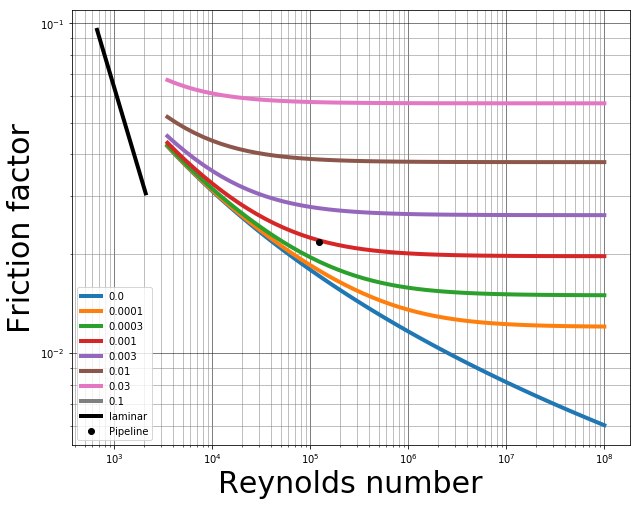

In [61]:
#Set the size of the figure to make it big!
plt.figure('ax',(10,8))


#--------------------------------------------------------------------------------------
#---------------------WRITE CODE BELOW-------------------------------------------------
#--------------------------------------------------------------------------------------
#You should begin by plotting your data. 

for i in range(len(fG)):
    plt.plot( ReG,fG[i,:], '-', linewidth = 4)


#fig = plt.figure()  
plt.plot(ReLam,fLam,'k-',linewidth = 4)
plt.plot(pipeline_Re,fPipe,'ko')

#Your legend should go below. If you try to make your legend before you make you plot your data, the legend will not show and you will be dazed and confused.
mylegend = np.append(eGraph.astype('str'),[('laminar', 'Pipeline')])  
leg = plt.legend(mylegend, loc='best')

#--------------------------------------------------------------------------------------
#---------------------WRITE CODE ABOVE-------------------------------------------------
#--------------------------------------------------------------------------------------

#LOOK AT ALL THIS COOL CODE!
plt.yscale('log')
plt.xscale('log')
plt.grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)

#Set the grayscale of the minor gridlines. Note that 1 is white and 0 is black.
plt.grid(b=True, which='minor', color='0.5', linestyle='-', linewidth=0.5)

#The next 2 lines of code are used to set the transparency of the legend to 1. 
#The default legend setting was transparent and was cluttered.


plt.xlabel('Reynolds number', fontsize=30)
plt.ylabel('Friction factor', fontsize=30)

plt.show()  

### 13) 
Researchers in the AguaClara laboratory collected the following head loss data through a 1/8" diameter tube that was 2 m long using water at 22°C. The data is in a comma separated data (.csv) file named ['Head_loss_vs_Flow_dosing_tube_data.csv'](https://github.com/AguaClara/CEE4540_DC/blob/master/Head_loss_vs_Flow_dosing_tube_data.csv). Use the pandas read csv function (`pd.read_csv('filename.csv')`) to read the data file. Display the data so you can see how it is formatted.

In [49]:
head_loss_data = pd.read_csv('Head_loss_vs_Flow_dosing_tube_data.csv')    
head_loss_data  

,Head loss (m),Flow rate (mL/min)
0,0.063,41.833333
1,0.073,48.666667
2,0.083,51.500000
3,0.093,60.833333
4,0.103,67.000000
5,0.113,73.333333
6,0.123,77.000000
7,0.133,82.666667
8,0.143,86.500000
9,0.153,94.833333


### 14)
Using the data table from Problem 13, assign the head loss **and flow rate** data to separate 1-D arrays. Attach the correct units. `np.array` can extract the data by simply inputting the text string of the column header. Here is example code to create the first array:

`HL_data=np.array(head_loss_data['Head loss (m)'])*u.m`

In [50]:
HL_data = np.array(head_loss_data['Head loss (m)'])*u.m
Q_data = np.array(head_loss_data['Flow rate (mL/min)'])*u.mL/u.min

### 15)
Calculate and report the maximum and minimum Reynolds number for this data set. Use the tube and temperature parameters specified in Problem 13. Use the `min` and `max` functions which take arrays as their inputs.

In [51]:
D_tube=1/8*u.inch
L_tube=2*u.m
T_data=u.Quantity(22,u.degC)
nu_data=pc.viscosity_kinematic(T_data)
Re_data_max=max(pc.re_pipe(Q_data,D_tube,nu_data))
Re_data_min=min(pc.re_pipe(Q_data,D_tube,nu_data))
print('The Reynolds number varied from '+ut.sig(Re_data_min,2)+' to '+ut.sig(Re_data_max,2)+'.')

The Reynolds number varied from 2.9e+2 to 1.0e+3.


### 16)
You will now create a graph of headloss vs flow for the tube mentioned in the previous problems. This graph will have two sets of data: the real data contained within the csv file and some theoretical data. The theoretical data is what we would expect the headloss through the tube to be in an ideal world for any given flow. When calculating the theoretical headloss, assume that minor losses are negligible. Plot the data from the csv file as individual data points and the theoretical headloss as a continuous curve. Make the y-axis have units of cm and the x-axis have units of mL/s. 

A few hints.
* To find the theoretical headloss, you will first need to create an array of different flow values. While you could use the values in the csv file that you extracted in Problem 14, we would instead like you to create an array of 50 equally-spaced flow values. These values shall be between the minimum and maximum flows in the csv file.
* You can use the `np.linspace(input1, input2, input3)` function to create this set of equally-spaced flows. Inputs for `np.linspace` are the same as they were for `np.logspace`, which was used in Problem 12a). Linspace does not work with units; you will need to remove the units (using `.magnitude`) from the inputs to `np.logspace` and then reattach the correct units of flow after creating the array.
* The `pc.headloss_fric` function can handle arrays as inputs, so that makes it easy to produce the theoretical headloss array once you have finished your equally-spaced flow array.
* When using `plt.plot`, make sure to convert the flow and headloss data to the desired units.



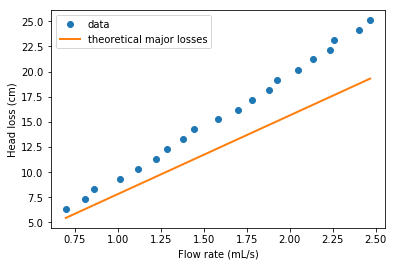

In [58]:
Qpoint=50

QGraph= np.linspace((min(Q_data).to(u.mL/u.s)).magnitude, (max(Q_data).to(u.mL/u.s)).magnitude, Qpoint)*u.mL/u.s


plt.plot(Q_data.to(u.mL/u.s),HL_data.to(u.cm),'o')
plt.plot(QGraph.to(u.mL/u.s),pc.headloss_fric(QGraph,D_tube,L_tube,nu_data,0*u.mm).to(u.cm), '-',linewidth=2)


leg=plt.legend(['data','theoretical major losses'], loc='best')
#leg.get_frame().set_alpha(1)
plt.xlabel('Flow rate (mL/s)')
plt.ylabel('Head loss (cm)')
plt.show()  

The theoretical model doesn't fit the data very well. We assumed that major losses dominated. But that assumption was wrong. So let's try a more sophisticated approach where we fit minor losses to the data. Below we demonstrate the use of the [scipy curve_fit method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) to fit the minor loss coefficient given this data set.  In this example, `Q_data` is the flow rate array for the csv file from problem 13. You should re-name this variable below to whatever you titled this variable.

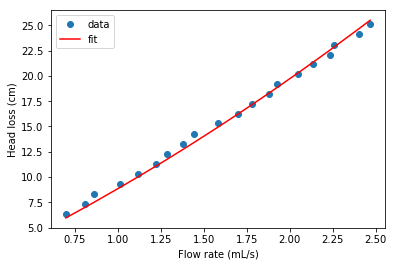

The root mean square error for the model fit when adjusting the minor loss coefficient was 0.39 cm


In [62]:
from scipy.optimize import curve_fit

# Define a new function that calculates head loss given the flow rate 
# and the parameter that we want to use curve fitting to estimate
# Define the other known values inside the function because we won't be passing those parameters to the function.

def HL_curvefit(FlowRate, KMinor):
    # The tubing is smooth AND pipe roughness isn't significant for laminar flow.
    PipeRough = 0*u.mm
    L_tube = 2*u.m
    T_data = u.Quantity(22,u.degC)
    nu_data = pc.viscosity_kinematic(T_data)
    D_tube = 1/8*u.inch 
    # pass all of the parameters to the head loss function and then strip the units so 
    # the curve fitting function can handle the data.
    return (pc.headloss(FlowRate, D_tube, L_tube, nu_data, PipeRough, KMinor)).magnitude

# The curve fit function will need bounds on the unknown parameters to find a real solution. 
# The bounds for K minor are 0 and 20. 

# The curve fit function returns a list that includes the optimal parameters and the covariance.

popt, pcov = curve_fit(HL_curvefit, Q_data, HL_data, bounds=[[0.],[20]])

K_minor_fit = popt[0]

# Plot the raw data
plt.plot(Q_data.to(u.mL/u.s), HL_data.to(u.cm), 'o', label='data')

# Plot the curve fit equation. 
plt.plot(Q_data.to(u.mL/u.s), ((HL_curvefit(Q_data, *popt))*u.m).to(u.cm), 'r-', label='fit')
plt.xlabel('Flow rate (mL/s)')
plt.ylabel('Head loss (cm)')
plt.legend()
plt.show()

#Calculate the root mean square error to estimate the goodness of fit of the model to the data
RMSE_Kminor = (np.sqrt(np.var(np.subtract((HL_curvefit(Q_data, *popt)),HL_data.magnitude)))*u.m).to(u.cm)
print('The root mean square error for the model fit when adjusting the minor loss coefficient was '+ut.sig(RMSE_Kminor,2))

### 17)
Repeat the analysis from the previous cell, but this time assume that the minor loss coefficient is zero and that diameter is the unknown parameter. The bounds specified in the line beginning with `popt, pcov` should be changed from the previous question (which had bounds from 0 to 20) to the new bounds of 0.001 to 0.01. 

Hint: Don't think too much about this, you only need to change the name of the defined function (perhaps "`HL_curvefit2`"?) and adjust its inputs/values.

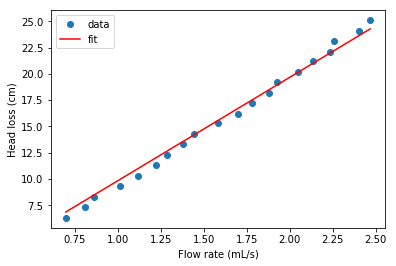

The root mean square error for the model fit when adjusting the diameter was 1.5 cm


In [54]:
# Define a new function that calculates head loss given the flow rate 
# and the parameter that we want to use curve fitting to estimate
# Define the other known values inside the function because we won't be passing those parameters to the function.

def HL_curvefit2(FlowRate, D_tube):
    # The tubing is smooth AND pipe roughness isn't significant for laminar flow.
    PipeRough = 0*u.mm
    L_tube=2*u.m
    T_data=u.Quantity(22,u.degC)
    nu_data=pc.viscosity_kinematic(T_data)
    KMinor=0 
    # pass all of the parameters to the head loss function and then strip the units so 
    # the curve fitting function can handle the data.
    return (pc.headloss(FlowRate, D_tube, L_tube, nu_data, PipeRough, KMinor)).magnitude

# The curve fit function will need bounds on the two unknown parameters to find a real solution. 
# The bounds for the diameter are 1 to 10 mm and must be given in meters.
# The curve fit function returns a list that includes the optimal parameters and the covariance.

popt, pcov = curve_fit(HL_curvefit2, Q_data, HL_data, bounds=[[0.001],[0.01]])

D_tube_fit = popt[0]*u.m

# Plot the raw data
plt.plot(Q_data.to(u.mL/u.s), HL_data.to(u.cm), 'o', label='data')

# Plot the curve fit equation. 
plt.plot(Q_data.to(u.mL/u.s), ((HL_curvefit2(Q_data, *popt))*u.m).to(u.cm), 'r-', label='fit')
plt.xlabel('Flow rate (mL/s)')
plt.ylabel('Head loss (cm)')
plt.legend()
plt.show()

#Calculate the root mean square error to estimate the goodness of fit of the model to the data
RMSE_Diameter = (np.sqrt(np.var(np.subtract((HL_curvefit2(Q_data, *popt)),HL_data.magnitude)))*u.m).to(u.cm)
print('The root mean square error for the model fit when adjusting the diameter was '+ut.sig(RMSE_Diameter,2))

### 18
Changes to which of the two parameters, minor loss coefficient or tube diameter, results in a better fit to the data?

The root mean square error was smaller when the minor loss coefficient was varied to fit the data. 

### 19
What did you find most difficult about learning to use Python? Create a brief example as an extension to this tutorial to help students learn the topic that you found most difficult.

## Final Pointer
It is good practice to select Restart & Run All from the Kernel menu after completing an assignment to make sure that everything in your notebook works correctly and that you haven't deleted an essential line of code! 
